In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

# train

In [25]:
train_df=pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')

D:\Anaconda\envs\computervision\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

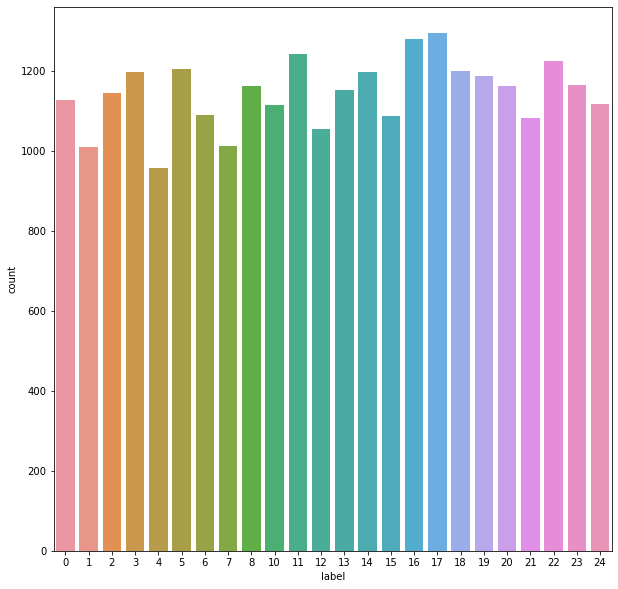

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(train_df['label'])

In [27]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [28]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [29]:
x_train = train_df.values
x_test = test_df.values
x_train = (x_train/255)
x_train = x_train.reshape(-1,28,28,1)
x_test = (x_test/255)
x_test = x_test.reshape(-1,28,28,1)

In [30]:
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)
datagen.fit(x_train)

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [39]:
model = Sequential()
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(16,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(24,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 16)         

In [40]:
Model = model.fit(datagen.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/20
215/215 [==============================] - 11s 50ms/step - loss: 1.0000 - accuracy: 0.6824 - val_loss: 3.2210 - val_accuracy: 0.2355
Epoch 2/20
215/215 [==============================] - 22s 101ms/step - loss: 0.1943 - accuracy: 0.9347 - val_loss: 0.8698 - val_accuracy: 0.7264
Epoch 3/20
215/215 [==============================] - 25s 117ms/step - loss: 0.1050 - accuracy: 0.9655 - val_loss: 0.1492 - val_accuracy: 0.9479
Epoch 4/20
215/215 [==============================] - 25s 117ms/step - loss: 0.0651 - accuracy: 0.9785 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 5/20
215/215 [==============================] - 25s 117ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 6/20
215/215 [==============================] - 25s 115ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.1632 - val_accuracy: 0.9462
Epoch 7/20
213/215 [============================>.] - ETA: 0

In [42]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

array([ 6,  5, 10,  0,  3], dtype=int64)

In [43]:
cm = confusion_matrix(y,predictions)

In [48]:
cm = pd.DataFrame(cm , index = [i for i in range(26) if i != 9] , columns = [i for i in range(26) if i != 9])

<AxesSubplot:>

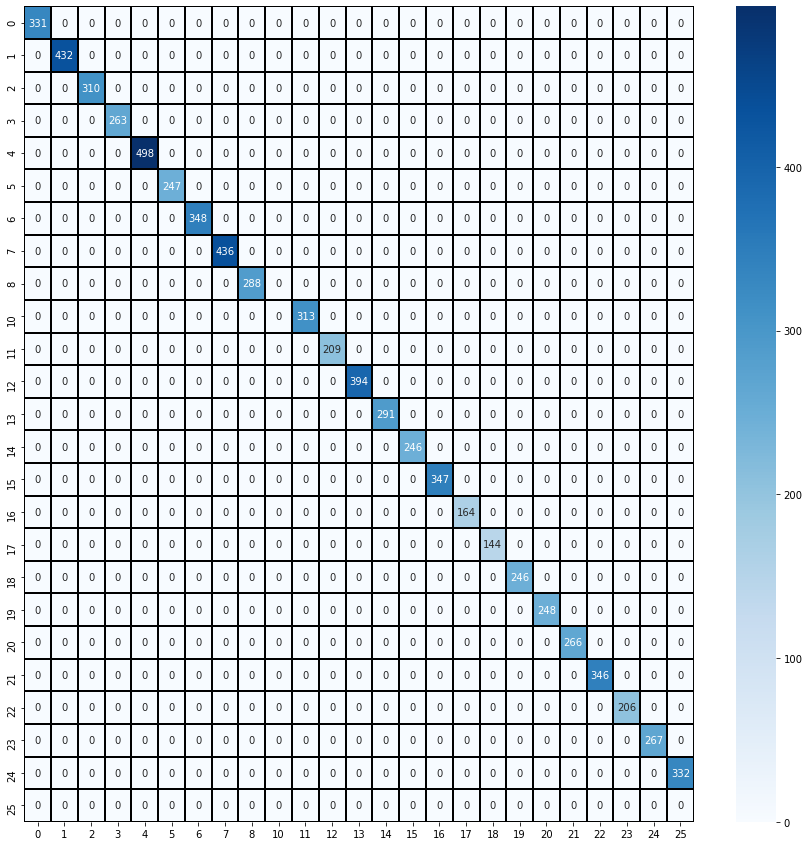

In [49]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')